In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
# Import Data
df=pd.read_csv("data/stud.csv")

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
X = df.drop(["math_score"],axis=1)
y = df.math_score

In [12]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer (
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [16]:
X =  preprocessor.fit_transform(X)

In [17]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [21]:
# Create a function to give all metrics after model training

def evaluate_model (true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse, r2_square


In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XG Boost Regressor": XGBRegressor(),
    "CAT Boosting Regressor": CatBoostRegressor(verbose=False),
    "ADA Boost regressor": AdaBoostRegressor()

}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #make Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate Train and test dataset
    model_train_mae,model_train_mse,model_train_rmse, model_train_r2 =evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training Set")
    print("- RMSE:{:0.4f}".format(model_train_rmse))
    print("- MAE:{:0.4f}".format(model_train_mae))
    print("- MSE:{:0.4f}".format(model_train_mse))
    print("- R2 Score:{:0.4f}".format(model_train_r2))

    print("Model Performance for Test Set")
    print("- RMSE:{:0.4f}".format(model_test_rmse))
    print("- MAE:{:0.4f}".format(model_test_mae))
    print("- MSE:{:0.4f}".format(model_test_mse))
    print("- R2 Score:{:0.4f}".format(model_test_r2))

    print("===============================================================")

    r2_list.append(model_test_r2)

    
    






Linear Regression
Model Performance for Training Set
- RMSE:5.3293
- MAE:4.2715
- MSE:28.4013
- R2 Score:0.8740
Model Performance for Test Set
- RMSE:5.4252
- MAE:4.2222
- MSE:29.4326
- R2 Score:0.8790
Lasso
Model Performance for Training Set
- RMSE:6.5938
- MAE:5.2063
- MSE:43.4784
- R2 Score:0.8071
Model Performance for Test Set
- RMSE:6.5197
- MAE:5.1579
- MSE:42.5064
- R2 Score:0.8253
Ridge
Model Performance for Training Set
- RMSE:5.3233
- MAE:4.2650
- MSE:28.3378
- R2 Score:0.8743
Model Performance for Test Set
- RMSE:5.3904
- MAE:4.2111
- MSE:29.0563
- R2 Score:0.8806
K-Neighbors Regressor
Model Performance for Training Set
- RMSE:5.7079
- MAE:4.5168
- MSE:32.5799
- R2 Score:0.8555
Model Performance for Test Set
- RMSE:7.2530
- MAE:5.6210
- MSE:52.6066
- R2 Score:0.7838
Decision Tree
Model Performance for Training Set
- RMSE:0.2795
- MAE:0.0187
- MSE:0.0781
- R2 Score:0.9997
Model Performance for Test Set
- RMSE:8.2495
- MAE:6.5050
- MSE:68.0550
- R2 Score:0.7203
Random Forest
M

In [27]:
r2_list

[0.8790464771743793,
 0.8253197323627853,
 0.8805931485028738,
 0.7838129945787431,
 0.7203277411210067,
 0.8531394450188617,
 0.8277965653186071,
 0.8516318920747058,
 0.8482699380942029]

In [28]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=["Model Name","R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879046
5,Random Forest,0.853139
7,CAT Boosting Regressor,0.851632
8,ADA Boost regressor,0.848270
6,XG Boost Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.720328


In [29]:
# We are picking Linear Regression
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of model is %.2f" %score)

Accuracy of model is 87.90


Text(0, 0.5, 'Predicted')

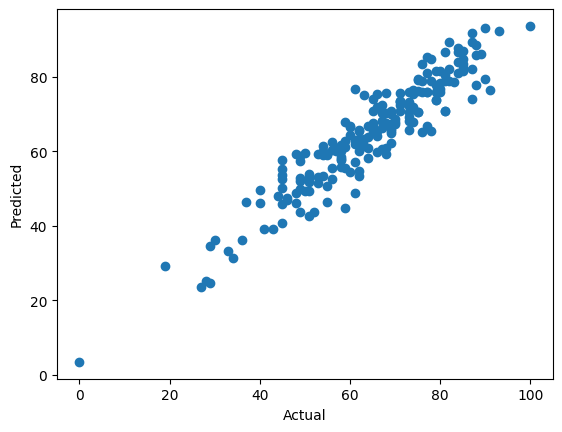

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

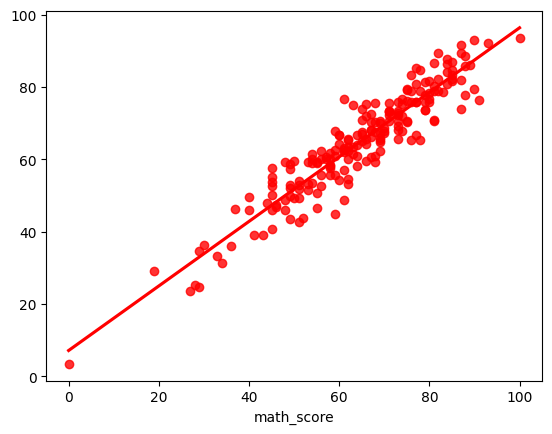

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None, color="red")

In [32]:
# Difference between Actual and pred Values
pred_df = pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_pred, "Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000


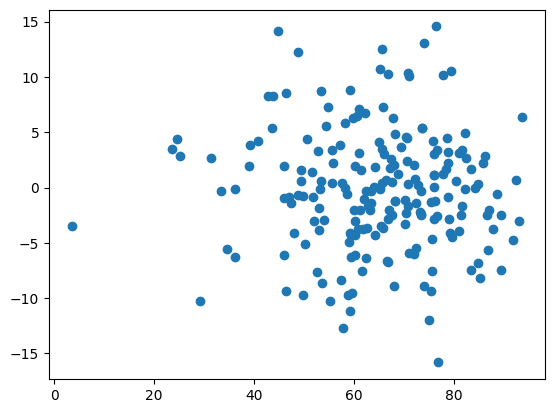

In [41]:
plt.scatter(y=pred_df["Difference"],x=pred_df["Predicted Value"])

<Axes: xlabel='Predicted Value', ylabel='Difference'>

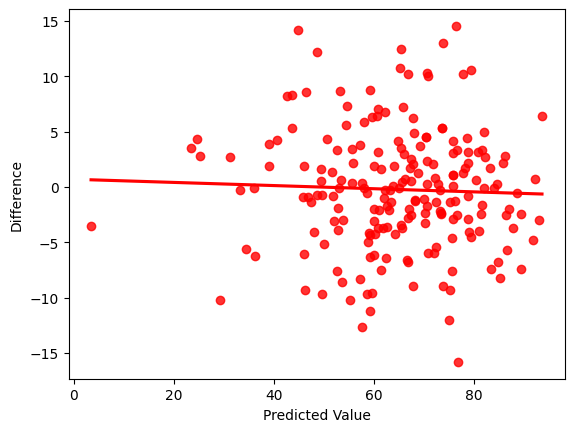

In [42]:
sns.regplot(y=pred_df["Difference"],x=pred_df["Predicted Value"],ci=None, color="red")